# Step-by-step Tutorial

This tutorial demonstrates how to use the UXsim++ package to simulate traffic scenarios and analyze the results using Python in a Jupyter Notebook environment.


## Simple Scenario Example

First, import the UXsim++ module.


In [1]:
from uxsimpp import newWorld, Analyzer

### Scenario Definition

First, we will define the main simulation world `W`.
The simulation scenario is defined by creating an object of the World class, which represents the main simulation environment. 
The constructor takes several parameters. 
The unit of time is s (seconds) and the unit of length is m (meters).

In [ ]:
W = newWorld(
    name="basic",   # Scenario name. Can be blank. Used as the folder name for saving results.
    deltan=5,       # Simulation aggregation unit Δn. Defines how many vehicles are grouped together (i.e., platoon size) for computation. Computation cost is generally inversely proportional to deltan^2.
    tmax=1200,      # Total simulation time (s)
    random_seed=42, # Set the random seed. Specify if you want repeatable experiments. If not, set to None. This function is not yet completed.
)

Next, the nodes and links of the network are defined using the `addNode` (to add `Node` object representing an intersection) and `addLink` (to add `Link` object representing a road) methods of the World object.

In [3]:
W.addNode(name="orig1", x=0, y=0)
W.addNode(name="orig2", x=0, y=2)
W.addNode(name="merge", x=1, y=1)
W.addNode(name="dest",  x=2, y=1)

W.addLink(name="link1", start_node="orig1", end_node="merge", length=1000, free_flow_speed=20)
W.addLink(name="link2", start_node="orig2", end_node="merge", length=1000, free_flow_speed=20)
W.addLink(name="link3", start_node="merge", end_node="dest",  length=1000, free_flow_speed=20)

<Link `link3`>

Finally, the traffic demand between origin-destination (OD) pairs is specified using the `adddemand` method, which add appropriate number of `Vehicle` objects representing groups of cars.

In [4]:
W.adddemand(origin="orig1", destination="dest", start_time=0,   end_time=1000, flow=0.45)
W.adddemand(origin="orig2", destination="dest", start_time=400, end_time=1000, flow=0.6)

You can check the scenario statistics by `W.print_scenario_stats()`.

In [5]:
W.print_scenario_stats()

Scenario statistics:
    duration: 1200 s
    timesteps: 240
    nodes: 4
    links: 3
    vehicles: 800 veh
    platoon size: 5 veh
    platoons: 160
    vehicles: 800 veh


### Simulation Execution

Once the scenario is defined, the simulation can be executed by calling the `exec_simulation` method of the `World` object.
It first show the summary of the simulation setting, the following information is printed during the simulation to see the progress:

- Current simulation time
- Number of vehicles in the network
- Average speed of vehicles

In [6]:
W.exec_simulation()

Simulating...
      time| # of vehicles|  ave speed
       0 s|         0 veh|   0.00 m/s
     120 s|        45 veh|  20.00 m/s
     240 s|        45 veh|  20.00 m/s
     360 s|        45 veh|  17.78 m/s
     480 s|        90 veh|  16.67 m/s
     600 s|       125 veh|  14.40 m/s
     720 s|       160 veh|  10.31 m/s
     840 s|       190 veh|   8.95 m/s
     960 s|       205 veh|   8.29 m/s
    1080 s|       160 veh|   6.72 m/s


### Results Analysis

`W.print_simple_results()` is useful to check the simulation scenario quickly.

In [7]:
W.print_simple_results()

Stats:
    Average speed: 11.14
    Average speed ratio: 0.56
    Trips completion: 735.00 / 800.00


For the detailed analysis and visualization, the `Analyzer` class is required.

In [8]:
ana = Analyzer(W, show_mode=True, save_mode=True)

Currently, the implementation of `Analyzer` is not yet completed, but the following functions are available.

#### Link-level

Visualization of vehicle trajectories as time-space diagram on a link or consecutive links:

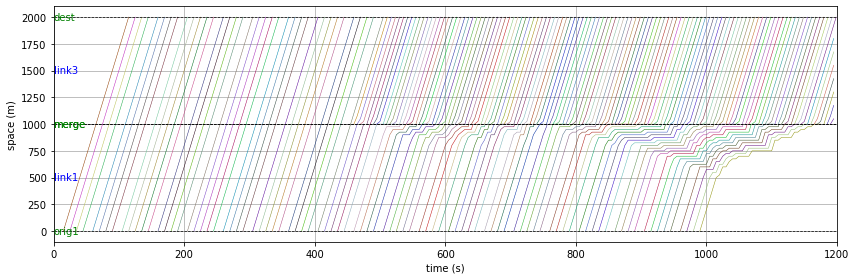

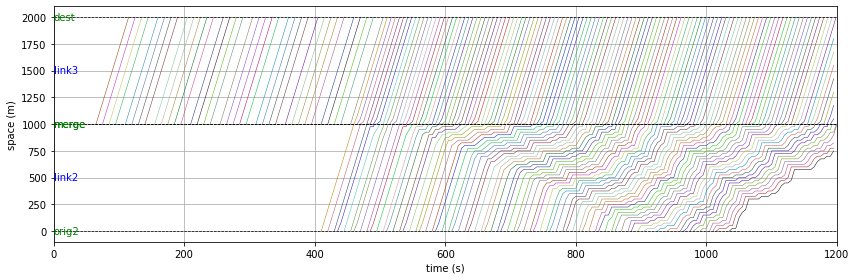

In [9]:
ana.plot_time_space_trajectories(["link1", "link3"])
ana.plot_time_space_trajectories(["link2", "link3"])

#### Network-level

Network traffic states can be visualized by number of ways:

- `W.analyzer.network(t)`: Snapshots of link-average traffic states on time `t` <!-- - `W.analyzer.network_average()`: Time-averaged link state over the entire simulation period-->
- `W.analyzer.network_anim()`: Dynamic animation of network traffic states
- `W.analyzer.network_fancy()`: Dynamic animation of vehicle trajectories in network


Since dynamic network traffic flow is a complicated spatial-temporal phenomenon, its visualization is not very easy. Please choose appropriate styles depending on your purposes.

Note that the animation generation speed for large scenarios could take some time.

Note also that this example uses left-handed traffic rule (e.g., Japan, UK). If you want to use right-handed one, you need to specify option `left_handed=0`.

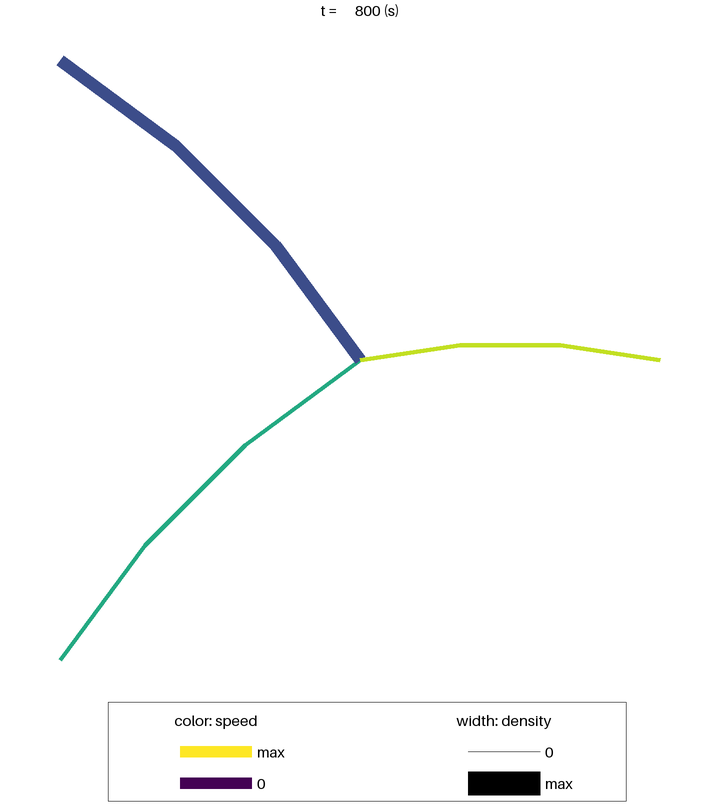

In [10]:
ana.network(t=800, image_return=True) #image_return=True is required to show the image on Jupyter Notebook

 generating animation...


  0%|          | 0/10 [00:00<?, ?it/s]

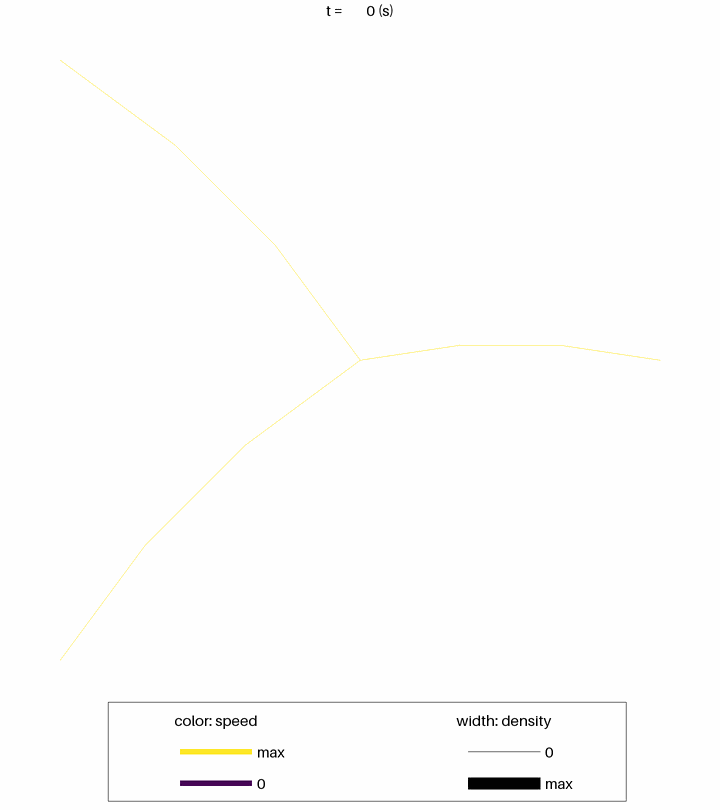

In [11]:
ana.network_anim()  #this is saved as `out_basic/anim_network.gif`

# load and show the saved image on Jupyter Notebook
from IPython.display import Image, display
display(Image(filename='out_basic/anim_network.gif', format='png'))

 generating animation...


  0%|          | 0/120 [00:00<?, ?it/s]

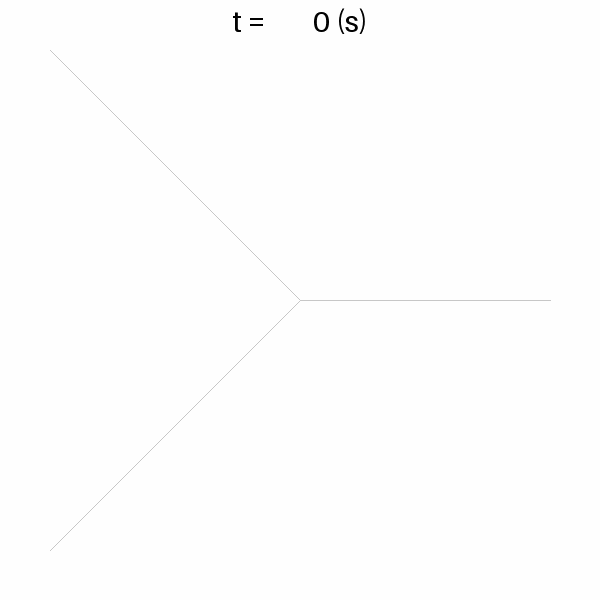

In [12]:
ana.network_fancy()

# load and show the saved image on Jupyter Notebook
display(Image(filename='out_basic/anim_network_fancy.gif', format="png"))

## Large grid network 

The tutorial concludes with a larger example applying the package to simulate a grid network with large number of links and vehicles. 
This example also demonstrates how to define scenario using Python coding.

Scenario statistics:
    duration: 6000.00 s
    timesteps: 1200
    nodes: 121
    links: 440
    vehicles: 48400 veh
    platoon size: 5.00 veh
    platoons: 9680
    vehicles: 48400.00 veh
Simulating...
      time| # of vehicles|  ave speed
       0 s|         0 veh|   0.00 m/s
     600 s|      9575 veh|  14.75 m/s
    1200 s|     16885 veh|  12.12 m/s
    1800 s|     20745 veh|  11.17 m/s
    2400 s|     23015 veh|   9.97 m/s
    3000 s|     17160 veh|  11.17 m/s
    3600 s|      6760 veh|  16.86 m/s
    4200 s|       160 veh|  20.00 m/s
    4800 s|         0 veh|   0.00 m/s
    5400 s|         0 veh|   0.00 m/s
Stats:
    Average speed: 12.03
    Average speed ratio: 0.60
    Trips completion: 48400.00 / 48400.00
 generating animation...


  0%|          | 0/50 [00:00<?, ?it/s]

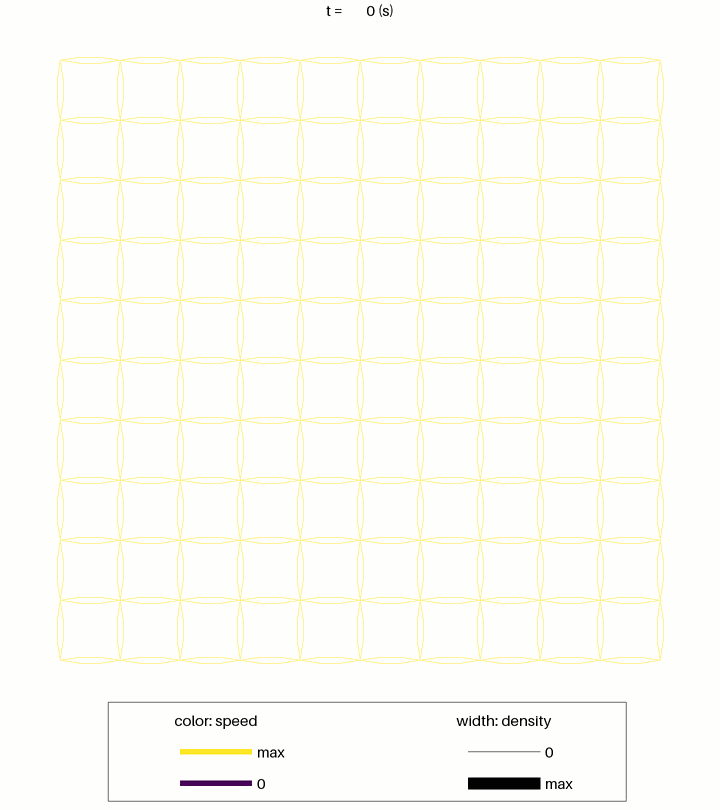

In [13]:
W = newWorld(
    "grid",
    tmax=6000.0,
    deltan=5,
    duo_update_time=300.0,  #route choice model parameter: the time interval for decision updates
    duo_update_weight=0.25, #route choice model parameter: the adoptation speed
    print_mode=1,
    random_seed=42
)

# scenario
#automated network generation
#deploy nodes as an imax x jmax grid
imax = 11
jmax = 11
nodes = {}
for i in range(imax):
    for j in range(jmax):
        nodes[i,j] = W.addNode(f"n{(i,j)}", i, j)

#create links between neighborhood nodes
links = {}
for i in range(imax):
    for j in range(jmax):
        if i != imax-1:
            links[i,j,i+1,j] = W.addLink(f"l{(i,j,i+1,j)}", nodes[i,j], nodes[i+1,j], length=1000, free_flow_speed=20, jam_density=0.2, merge_priority=1)
        if i != 0:
            links[i,j,i-1,j] = W.addLink(f"l{(i,j,i-1,j)}", nodes[i,j], nodes[i-1,j], length=1000, free_flow_speed=20, jam_density=0.2, merge_priority=1)
        if j != jmax-1:
            links[i,j,i,j+1] = W.addLink(f"l{(i,j,i,j+1)}", nodes[i,j], nodes[i,j+1], length=1000, free_flow_speed=20, jam_density=0.2, merge_priority=1)
        if j != 0:
            links[i,j,i,j-1] = W.addLink(f"l{(i,j,i,j-1)}", nodes[i,j], nodes[i,j-1], length=1000, free_flow_speed=20, jam_density=0.2, merge_priority=1)

#generate traffic demand between the boundary nodes
demand_flow = 0.04
demand_duration = 2500
for n1 in [(0,j) for j in range(jmax)]:
    for n2 in [(imax-1,j) for j in range(jmax)]:
        W.adddemand(nodes[n2], nodes[n1], 0, demand_duration, demand_flow)
        W.adddemand(nodes[n1], nodes[n2], 0, demand_duration, demand_flow)
for n1 in [(i,0) for i in range(imax)]:
    for n2 in [(i,jmax-1) for i in range(imax)]:
        W.adddemand(nodes[n2], nodes[n1], 0, demand_duration, demand_flow)
        W.adddemand(nodes[n1], nodes[n2], 0, demand_duration, demand_flow)

W.print_scenario_stats()

# execute simulation wit 



W.exec_simulation()

# analyze the result

W.print_simple_results()

ana = Analyzer(W)
ana.network_anim()

display(Image(filename="out_grid/anim_network.gif", format='png'))
